In [1]:
# !pip install efficientnet_pytorch
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image
from efficientnet_pytorch import EfficientNet
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [2]:
cv2.imread("imageDatabase/foot1/001_1.mat.jpeg").shape

(666, 256, 3)

In [3]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [4]:
train_dataset = train.flow_from_directory('imageDatabase/',
                                         target_size = (256,256),
                                         batch_size = 10,
                                         class_mode = 'categorical')

validation_dataset = train.flow_from_directory('imageDatabase/',
                                         target_size = (256,256),
                                         batch_size=10,
                                         class_mode = 'categorical')

Found 1440 images belonging to 40 classes.
Found 1440 images belonging to 40 classes.


In [5]:
train_dataset.class_indices


{'Foot1': 0,
 'Foot10': 1,
 'Foot11': 2,
 'Foot12': 3,
 'Foot13': 4,
 'Foot14': 5,
 'Foot15': 6,
 'Foot16': 7,
 'Foot17': 8,
 'Foot18': 9,
 'Foot19': 10,
 'Foot2': 11,
 'Foot20': 12,
 'Foot21': 13,
 'Foot22': 14,
 'Foot23': 15,
 'Foot24': 16,
 'Foot25': 17,
 'Foot26': 18,
 'Foot27': 19,
 'Foot28': 20,
 'Foot29': 21,
 'Foot3': 22,
 'Foot30': 23,
 'Foot31': 24,
 'Foot32': 25,
 'Foot33': 26,
 'Foot34': 27,
 'Foot35': 28,
 'Foot36': 29,
 'Foot37': 30,
 'Foot38': 31,
 'Foot39': 32,
 'Foot4': 33,
 'Foot40': 34,
 'Foot5': 35,
 'Foot6': 36,
 'Foot7': 37,
 'Foot8': 38,
 'Foot9': 39}

In [6]:
# model = EfficientNet.from_pretrained('efficientnet-b0')
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(256,256,3)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   ##
                                   tf.keras.layers.Flatten(),
                                   ##
                                   tf.keras.layers.Dense(512,activation= 'relu'),
                                   ##softmax
                                   tf.keras.layers.Dense(40,activation='softmax')
                                   ])

In [7]:
model.compile(loss='categorical_crossentropy',
             optimizer = 'adam',
             metrics=['acc'])


In [8]:
# checkpoint_path = "training_1/cp.ckpt"
# checkpoint_dir = os.path.dirname(checkpoint_path)

# # Create a callback that saves the model's weights
# cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
#                                                  save_weights_only=True,
#                                                  verbose=1)

In [9]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch = 16,
                     epochs = 8,
                     validation_data = validation_dataset)
#                      callbacks=[cp_callback])


Epoch 1/8
16/16 [==============================] - 19s 1s/step - loss: 4.1396 - acc: 0.1688 - val_loss: 2.9654 - val_acc: 0.3340
Epoch 2/8
16/16 [==============================] - 19s 1s/step - loss: 2.3527 - acc: 0.4938 - val_loss: 1.2312 - val_acc: 0.7778
Epoch 3/8
16/16 [==============================] - 19s 1s/step - loss: 0.9519 - acc: 0.7875 - val_loss: 0.6247 - val_acc: 0.8674
Epoch 4/8
16/16 [==============================] - 19s 1s/step - loss: 0.5097 - acc: 0.9000 - val_loss: 0.3993 - val_acc: 0.9174
Epoch 5/8
16/16 [==============================] - 19s 1s/step - loss: 0.3020 - acc: 0.9375 - val_loss: 0.2019 - val_acc: 0.9743
Epoch 6/8
16/16 [==============================] - 19s 1s/step - loss: 0.2085 - acc: 0.9625 - val_loss: 0.1222 - val_acc: 0.9667
Epoch 7/8
16/16 [==============================] - 19s 1s/step - loss: 0.1046 - acc: 0.9750 - val_loss: 0.0698 - val_acc: 0.9778
Epoch 8/8
16/16 [==============================] - 19s 1s/step - loss: 0.0723 - acc: 0.9812 - val

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

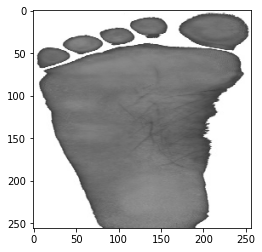

1/1 [==============================] - 0s 89ms/step
[[0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 8.888355e-15 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00]]


In [11]:
dir_path = 'testing'
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+i,target_size=(256,256))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis= 0)
    
    
    
    images = np.vstack([X])
    predicn = model.predict(images)
    print(predicn)

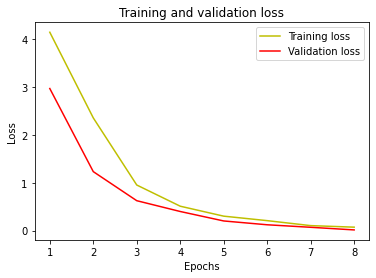

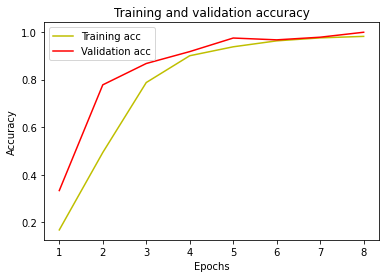

In [12]:
history = model_fit
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()